# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Bình Minh
- MSSV: 22127266
- Lớp: 22CLC03

# Import

In [214]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold


# Đọc dữ liệu

In [215]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần
train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,77,0,5,2,69.0
1,8,90,1,4,1,84.0
2,9,83,1,6,3,82.0
3,4,52,0,9,5,38.0
4,4,82,1,8,6,68.0


# Cài đặt hàm

In [216]:
# Cài đặt các hàm cần thiết ở đây
def plot_scatter(X_train, y_train, feature):
    """
    Plots a scatter plot between a feature in the training data and the Performance Index.

    Args:
        X_train (pandas.DataFrame): The training data.
        y_train (pandas.Series): The target variable (Performance Index) in the training data.
        feature (str): The name of the feature to plot against the Performance Index.

    Returns:
        None

    Displays a scatter plot with the specified feature on the x-axis and the Performance Index on the y-axis.
        
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'{feature} vs Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.show()


def plot_line(X_train, y_train, feature):
    """
    Plots a line plot between a continuous feature in the training data and the Performance Index.

    Args:
        X_train (pandas.DataFrame): The training data.
        y_train (pandas.Series): The target variable (Performance Index) in the training data.
        feature (str): The name of the continuous feature to plot against the Performance Index.

    Returns:
        None

    Displays a line plot with the specified feature on the x-axis and the Performance Index on the y-axis.
    """
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=X_train[feature], y=y_train)
    plt.title(f'{feature} vs Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.show()

def heat_map(train):
    """
    Generates a heatmap visualizing the correlation between features in the training data.

    Args:
        train (pandas.DataFrame): The training data.

    Returns:
        None

    Displays a heatmap with color intensity representing the correlation coefficient between features. 
        Higher values indicate stronger positive or negative correlations.
    """
    plt.figure(figsize=(5.5, 3.5))
    correlation_matrix = train.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

def plot_mean_bar(train, feature):
    """
    Plots a bar chart showing the mean Performance Index for each category of a categorical feature.

    Args:
        train (pandas.DataFrame): The training data.
        feature (str): The name of the categorical feature to plot.

    Returns:
        None

    Displays a bar chart where each bar represents the mean Performance Index for a specific category 
        within the chosen feature.
    """
    (train.groupby(feature)['Performance Index'].mean()).plot(kind='bar')
    plt.show()

def plot_scatter_v2(X_train, y_train, title, X_label, y_label='Performance Index'):
    """
    Plots a scatter plot with more customizable labels and title.

    Args:
        X_train (pandas.DataFrame or pandas.Series): The data to plot on the x-axis.
        y_train (pandas.Series): The data to plot on the y-axis.
        title (str): The title of the plot.
        X_label (str): The label for the x-axis.
        y_label (str, optional): The label for the y-axis. Defaults to 'Performance Index'. 

    Returns:
        None

    Displays a scatter plot with the provided labels and title.
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train, y=y_train)
    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(y_label)
    plt.show()

def plot_line_v2(X_train, y_train, title, X_label, y_label='Performance Index'):
    """
    Plots a line plot with more customizable labels and title.

    Args:
        X_train (pandas.DataFrame or pandas.Series): The data to plot on the x-axis.
        y_train (pandas.Series): The data to plot on the y-axis.
        title (str): The title of the plot.
        X_label (str): The label for the x-axis.
        y_label (str, optional): The label for the y-axis. Defaults to 'Performance Index'. 

    Returns:
        None

    Displays a line plot with the provided labels and title.
    """
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=X_train, y=y_train)
    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(y_label)
    plt.show()

def ea_plot():
    """
    Plots a bar chart showing the percentage of students with and without extracurricular activities 
    across different performance ranges.

    Returns:
        None

    Displays a bar chart with percentages stacked for each performance range, 
    separating students based on their extracurricular activity participation.
    """

    # 1. Define the bins for Performance Index
    bins = [0, 20, 40, 60, 80, 100]
    labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

    new_train = train.copy()

    # 2. Bin the Performance Index
    new_train['Performance Range'] = pd.cut(train['Performance Index'], bins=bins, labels=labels, include_lowest=True)

    # 3. Calculate percentages for Extracurricular Activities = 0 and 1 within each Performance Range
    percentages = new_train.groupby(['Performance Range', 'Extracurricular Activities']).size().unstack(fill_value=0)

    # 4. Normalize to get the percentage within each range
    percentages = percentages.div(percentages.sum(axis=1), axis=0) * 100

    # 5. Plot the data
    ax = percentages.plot(kind='bar', stacked=False, figsize=(6, 4))

    # Add labels and title
    ax.set_xlabel('Performance Range')
    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Students with and without Extracurricular Activities Across Performance Ranges')

    # Show the plot
    
    plt.show()

class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''
        return np.dot(X, self.w)

def mae(y, y_hat):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y - y_hat))

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

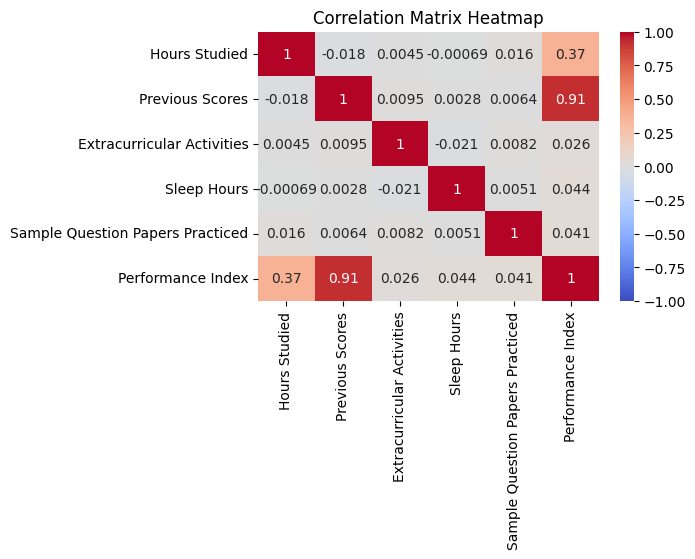

The 2 most impactful features: Hours Studied, Previous Scores


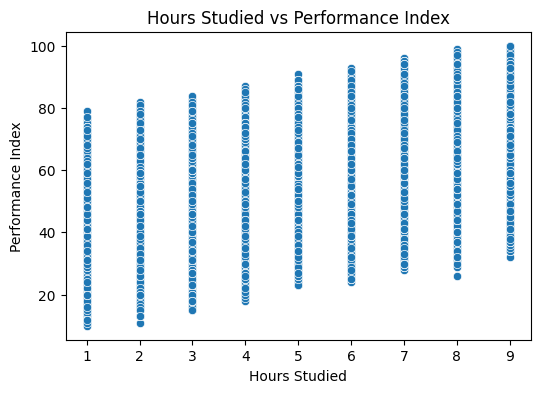

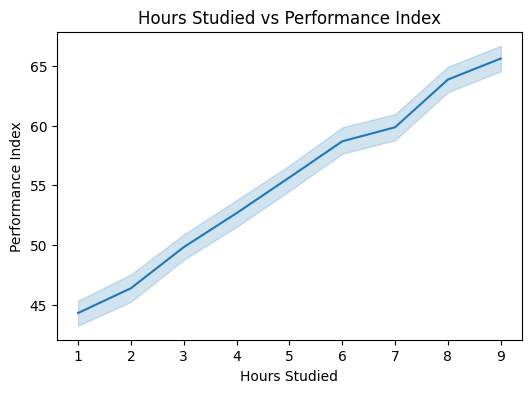

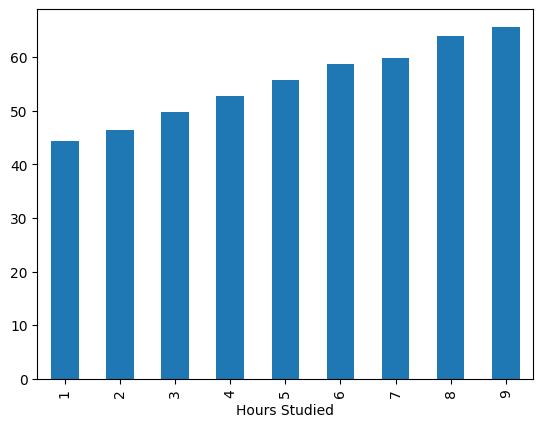

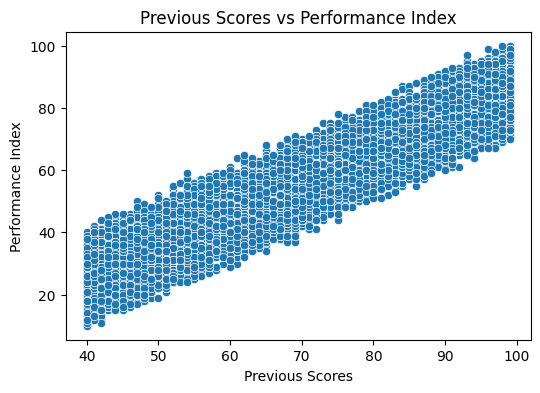

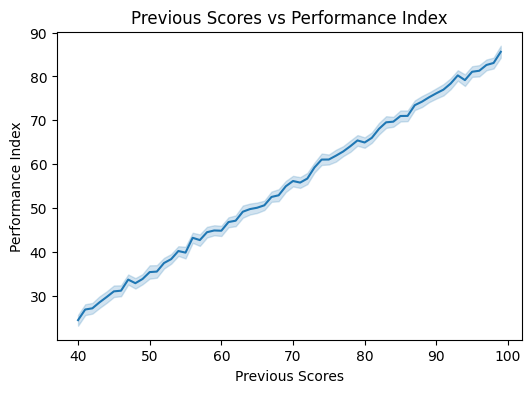

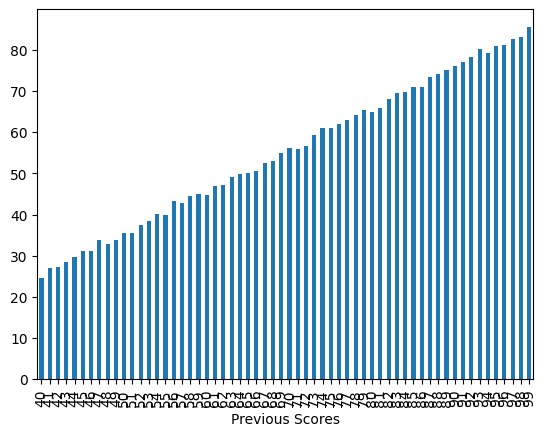

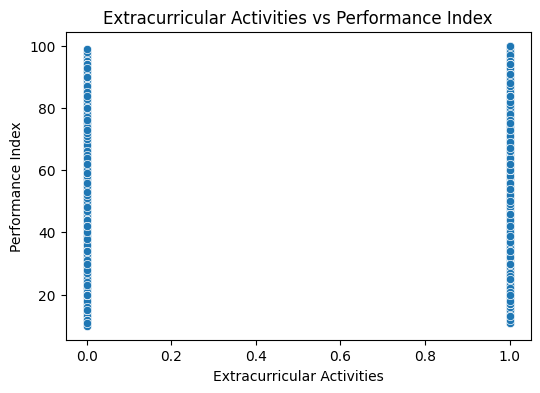

C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\1368466986.py:171: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentages = new_train.groupby(['Performance Range', 'Extracurricular Activities']).size().unstack(fill_value=0)


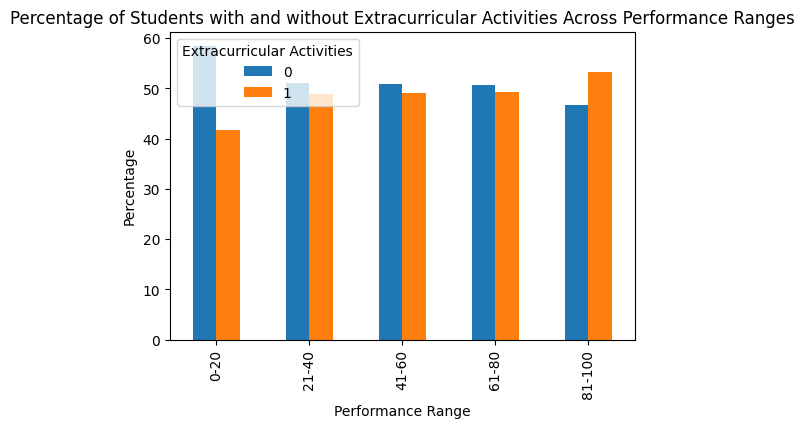

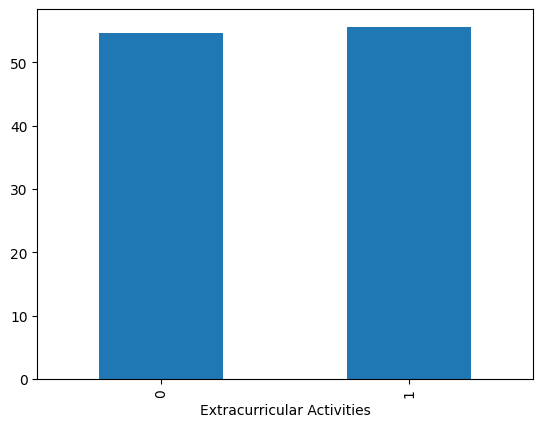

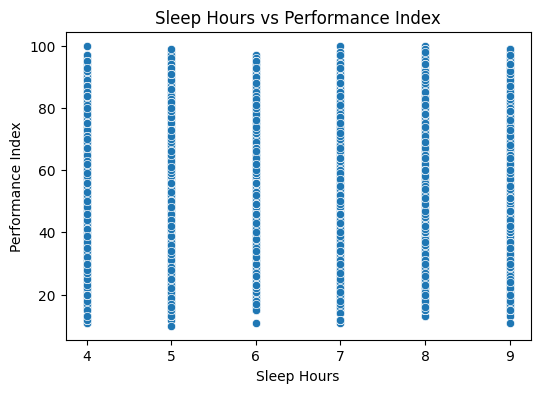

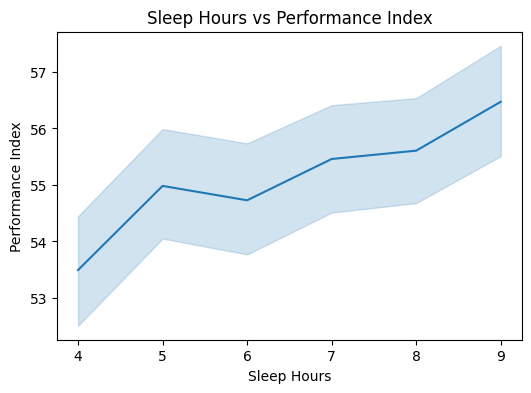

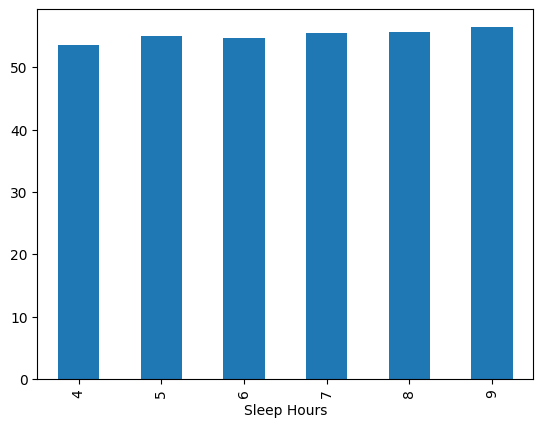

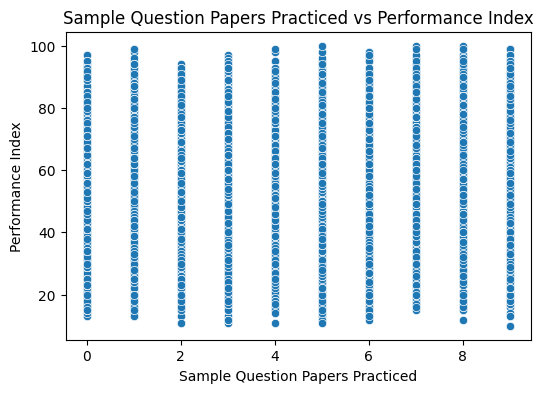

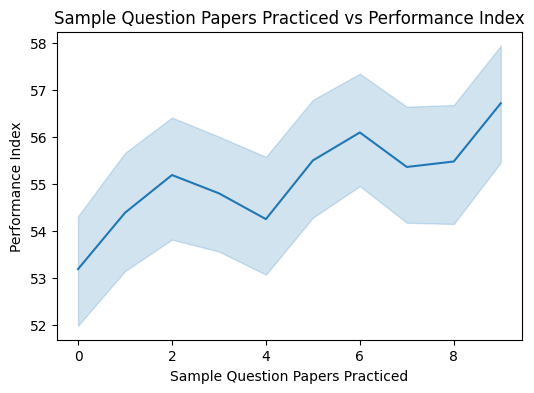

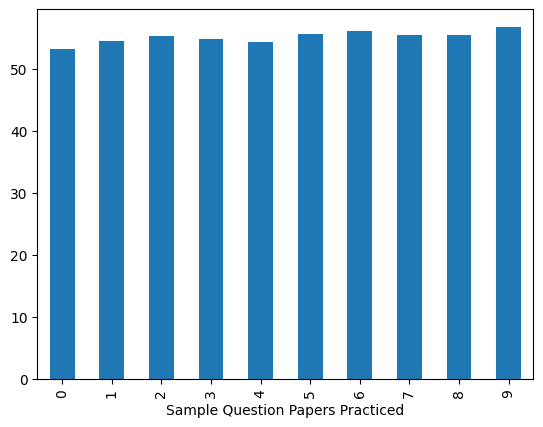

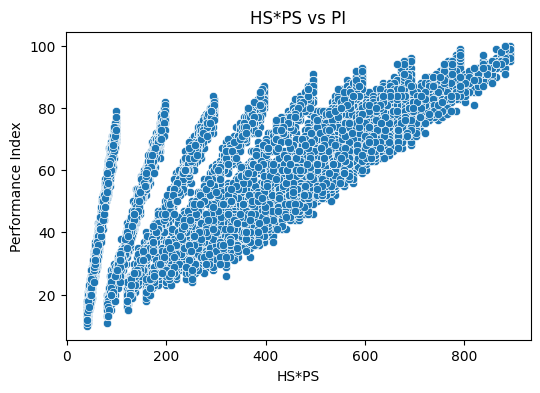

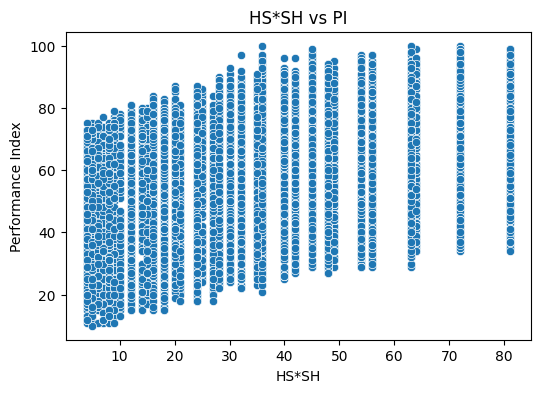

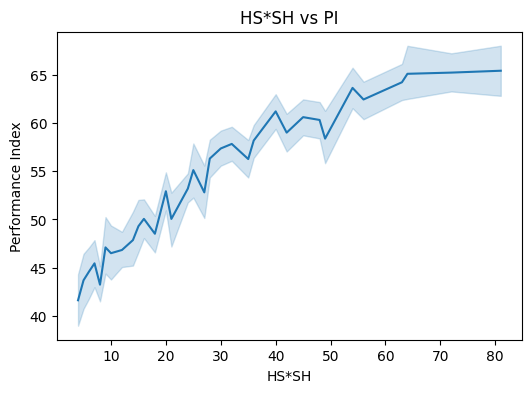

In [217]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
heat_map(train)

print("The 2 most impactful features: Hours Studied, Previous Scores")


for feature in X_train.columns:
    plot_scatter(X_train, y_train, feature)

    if feature != 'Extracurricular Activities':
        plot_line(X_train, y_train, feature)
    else:
        ea_plot()
    plot_mean_bar(train, feature)



plot_scatter_v2(X_train['Hours Studied']*X_train['Previous Scores'], y_train, 'HS*PS vs PI', 'HS*PS')
plot_scatter_v2(X_train['Hours Studied']*X_train['Sleep Hours'], y_train, 'HS*SH vs PI', 'HS*SH')
plot_line_v2(X_train['Hours Studied']*X_train['Sleep Hours'], y_train, 'HS*SH vs PI', 'HS*SH')

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [218]:
# Phần code cho yêu cầu 2a
def model_0(X_train, y_train):
    """
    Trains an Ordinary Least Squares (OLS) linear regression model on the given training data.

    Args:
        X_train (pandas.DataFrame): The training features (independent variables).
        y_train (pandas.Series): The target variable (dependent variable).

    Returns:
        lr: The trained OLS linear regression model.
    """
    lr = OLSLinearRegression().fit(X_train, y_train)
    return lr

# preprocess data
X_train_new = X_train.copy()

X_train_new.insert(0, "Ones", np.ones(X_train_new.shape[0]), False)

X_train_new

X_test_new = X_test.copy()

X_test_new.insert(0, "Ones", np.ones(X_test_new.shape[0]), False)

X_test_new


,Ones,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,1.0,7,74,0,8,1
1,1.0,6,89,1,8,8
2,1.0,3,79,0,8,1
3,1.0,7,62,0,8,8
4,1.0,5,51,0,7,7
...,...,...,...,...,...,...
995,1.0,4,97,0,9,5
996,1.0,4,81,0,7,0
997,1.0,9,44,0,9,9
998,1.0,3,41,1,5,6


In [219]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
lr = model_0(X_train_new, y_train)
print(lr.get_params().round(3))

y_hat = lr.predict(X_test_new)
mae(y_test, y_hat).round(3)

0   -33.969
1     2.852
2     1.018
3     0.604
4     0.474
5     0.192
dtype: float64


1.596

Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 2.852*\text{HS}  + 1.018*\text{PS} + 0.604*\text{EA} + 0.474*\text{SH} + 0.192*\text{SQPP}$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [228]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

# Shuffle data
train_shuffled = train.sample(frac=1, random_state=69).reset_index(drop=True)

# Create the k_fold for cross-validation
kf = KFold(5)

list_feature = X_train.columns

for feature in list_feature:
    # Train shuffled with selected feature
    train_shuffled_feature = train_shuffled[[feature, 'Performance Index']]

    X_shuffled = train_shuffled_feature.iloc[:, :-1]
    y_shuffled = train_shuffled_feature.iloc[:, -1]

    listMAE = []
    print(feature)
    for fold, (train_index, test_index) in enumerate(kf.split(train_shuffled_feature)):
        # print(f"Fold {fold + 1}")
        X_train_i = X_shuffled.iloc[train_index]
        y_train_i = y_shuffled.iloc[train_index]

        X_test_i = X_shuffled.iloc[test_index]
        y_test_i = y_shuffled.iloc[test_index]

        # Preprocess data
        X_train_i.insert(0, "Ones", np.ones(X_train_i.shape[0]), False)
        X_test_i.insert(0, "Ones", np.ones(X_test_i.shape[0]), False)

        # Train data
        lr_i = OLSLinearRegression().fit(X_train_i, y_train_i)

        # Predict with the model using the test dataset
        y_hat_test_i = lr_i.predict(X_test_i)

        # Find mae of this fold
        mae_i = mae(y_test_i, y_hat_test_i).round(3)
        listMAE.append(mae_i)

    print((sum(listMAE)/len(listMAE)).round(3))

Hours Studied
15.45
Previous Scores
6.619
Extracurricular Activities
16.194
Sleep Hours
16.188
Sample Question Papers Practiced
16.185


In [221]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

X_train_best_feature = X_train[['Previous Scores']]

# Preprocess data
X_train_best_feature.insert(0, "Ones", np.ones(X_train_best_feature.shape[0]), False)

# Train data
lr_bf = OLSLinearRegression().fit(X_train_best_feature, y_train)

# Predict with the model using the test dataset
y_hat_bf = lr_bf.predict(X_train_best_feature)

# Find parameter w
print(lr_bf.get_params())

0   -14.988646
1     1.010503
dtype: float64


In [222]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
X_test_best_feature = X_test[['Previous Scores']]

# Preprocess data
X_test_best_feature.insert(0, "Ones", np.ones(X_test_best_feature.shape[0]), False)

y_hat_test_bf = lr_bf.predict(X_test_best_feature)

# Find parameter w
print(lr_bf.get_params().round(3))

# Find mae of this test
mae_bf = mae(y_test, y_hat_test_bf).round(3)
print(mae_bf)

0   -14.989
1     1.011
dtype: float64
6.544


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011\text{*PS}$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [223]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

# -----------------------------------------------------------------------------------------------------------------
# Model 1: PI = w0 + w1*HS + w2*PS
# The 2 features that have the most effect on the Performance index
# -----------------------------------------------------------------------------------------------------------------

def model_1(X_train, y_train, X_test, y_test):
    """
    Trains a linear regression model using 'Hours Studied' and 'Previous Scores' as features.

    Args:
        X_train: Training features.
        y_train: Training target variable.
        X_test: Testing features.
        y_test: Testing target variable.

    Returns:
        mae_test_2f: MAE value using test set as prediction
        lr_2f: OLSLinearRegression object
    """
    X_train_2_features = X_train[['Hours Studied', 'Previous Scores']]
    X_test_2_features = X_test[['Hours Studied', 'Previous Scores']]

    # Preprocess data
    X_train_2_features.insert(0, "Ones", np.ones(X_train_2_features.shape[0]), False)
    X_test_2_features.insert(0, "Ones", np.ones(X_test_2_features.shape[0]), False)

    # Train data
    lr_2f = OLSLinearRegression().fit(X_train_2_features, y_train)

    # Find parameter w
    # print(lr_2f.get_params())

    # Predict with the model using the test dataset
    y_hat_test_2f = lr_2f.predict(X_test_2_features)

    # Find mae of this test
    mae_test_2f = mae(y_test, y_hat_test_2f).round(3)
    return mae_test_2f, lr_2f

# -----------------------------------------------------------------------------------------------------------------
# Model 2: PI = w0 + w1*HS*PS
# Try to scale the previous score with the hour study
# -----------------------------------------------------------------------------------------------------------------

def model_2(X_train, y_train, X_test, y_test):
    """
    Trains a linear regression model using the product of 'Hours Studied' and 'Previous Scores' as a feature.

    Args:
        X_train: Training features.
        y_train: Training target variable.
        X_test: Testing features.
        y_test: Testing target variable.

    Returns:
        mae_test_m: MAE value using test set as prediction
        lr_m: OLSLinearRegression object
    """
    # Multiply the 'Hours Studied' and 'Previous Scores' features
    X_train_multiply =  X_train['Hours Studied'] * X_train['Previous Scores']
    X_test_multiply = X_test['Hours Studied'] * X_test['Previous Scores']

    # Convert to DataFrame to allow inserting the bias term
    X_train_multiply = X_train_multiply.to_frame(name='Hours Studied*Previous Scores')
    X_test_multiply = X_test_multiply.to_frame(name='Hours Studied*Previous Scores')

    # Preprocess data
    X_train_multiply.insert(0, "Ones", np.ones(X_train_multiply.shape[0]), False)
    X_test_multiply.insert(0, "Ones", np.ones(X_test_multiply.shape[0]), False)

    # Train data
    lr_m = OLSLinearRegression().fit(X_train_multiply, y_train)

    # Predict with the model using the test dataset
    y_hat_test_m = lr_m.predict(X_test_multiply)

    # Find mae of this test
    mae_test_m = mae(y_test, y_hat_test_m).round(3)
    return mae_test_m, lr_m

# -----------------------------------------------------------------------------------------------------------------
# Model 3: PI = w0 + w1*HS + w2*PS + w3(HS*SH) + w4*(HS*SH)^2
# -----------------------------------------------------------------------------------------------------------------

def model_3(X_train, y_train, X_test, y_test):
    """
    Trains a linear regression model using 'Hours Studied', 'Previous Scores', and their interaction term and its square as features.

    Args:
        X_train: Training features.
        y_train: Training target variable.
        X_test: Testing features.
        y_test: Testing target variable.

    Returns:
            mae_test_m: MAE value using test set as prediction
            lr_m: OLSLinearRegression object
    """
    X_train = X_train.copy()
    X_test = X_test.copy()

    X_train.loc[:, 'HS*SH'] = X_train['Hours Studied'] * X_train['Sleep Hours']
    X_test.loc[:, 'HS*SH'] =  X_test['Hours Studied'] * X_test['Sleep Hours']

    X_train.loc[:, '(HS*SH)^2'] = (X_train['Hours Studied'] * X_train['Sleep Hours']) ** 2
    X_test.loc[:, '(HS*SH)^2'] =  (X_test['Hours Studied'] * X_test['Sleep Hours']) ** 2

    # Select relevant features including the new ones
    X_train_features = X_train[['Hours Studied', 'Previous Scores', 'HS*SH', '(HS*SH)^2']]
    X_test_features = X_test[['Hours Studied', 'Previous Scores', 'HS*SH', '(HS*SH)^2']]

    # Add bias term (intercept)
    X_train_features = X_train_features.copy()
    X_train_features.insert(0, "Ones", np.ones(X_train_features.shape[0]), False)
    X_test_features = X_test_features.copy()
    X_test_features.insert(0, "Ones", np.ones(X_test_features.shape[0]), False)

    # Train the model
    lr_p = OLSLinearRegression().fit(X_train_features, y_train)

    # Predict with the model using the test dataset
    y_hat_test_2f = lr_p.predict(X_test_features)

    # Calculate MAE of this test
    mae_test_p = mae(y_test, y_hat_test_2f).round(3)
    return mae_test_p, lr_p

# -----------------------------------------------------------------------------------------------------------------
# Model 4: Testing ground
# -----------------------------------------------------------------------------------------------------------------

def model_4(X_train, y_train, X_test, y_test):
    # Include the new feature "Sleep Hours" raised to the power of 3
    X_train = X_train.copy()
    X_test = X_test.copy()

    X_train.loc[:, 'Hours Studied Power 3'] = X_train['Hours Studied'] ** 3
    X_test.loc[:, 'Hours Studied Power 3'] = X_test['Hours Studied'] ** 3

    # Select relevant features including the new one
    X_train_features = X_train[['Hours Studied', 'Previous Scores', 'Hours Studied Power 3']]
    X_test_features = X_test[['Hours Studied', 'Previous Scores', 'Hours Studied Power 3']]
    
    # Add bias term (intercept)
    X_train_features = X_train_features.copy()
    X_train_features.insert(0, "Ones", np.ones(X_train_features.shape[0]), False)
    X_test_features = X_test_features.copy()
    X_test_features.insert(0, "Ones", np.ones(X_test_features.shape[0]), False)
    
    # Train the model
    lr_p = OLSLinearRegression().fit(X_train_features, y_train)
    
    # Predict with the model using the test dataset
    y_hat_test_2f = lr_p.predict(X_test_features)
    
    # Calculate MAE of this test
    mae_test_2f = mae(y_test, y_hat_test_2f).round(3)
    return mae_test_2f, lr_p


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [229]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

# Shuffle data
train_shuffled_2 = train.sample(frac=1, random_state=69).reset_index(drop=True)

# Create the k_fold for cross-validation
kf_2 = KFold(5)

# split the features and the target
X_shuffled_2 = train_shuffled_2.iloc[:, :-1]
y_shuffled_2 = train_shuffled_2.iloc[:, -1]

def cross_validation_model_0(X_shuffled, y_shuffled, kf):
    """
    Performs 5-fold cross-validation on model_0.

    Args:
        X_shuffled: Shuffled feature matrix.
        y_shuffled: Shuffled target variable.
        kf: KFold object

    Returns:
        None
    """

    listMAE = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled)):
        # print(f"Fold {fold + 1}")
        X_train_i = X_shuffled.iloc[train_index]
        X_train_i.insert(0, "Ones", np.ones(X_train_i.shape[0]), False)
        y_train_i = y_shuffled.iloc[train_index]

        X_test_i = X_shuffled.iloc[test_index]
        X_test_i.insert(0, "Ones", np.ones(X_test_i.shape[0]), False)
        y_test_i = y_shuffled.iloc[test_index]

        lr = model_0(X_train_i, y_train_i)

        y_hat_test_i = lr.predict(X_test_i)
        mae_i = mae(y_test_i, y_hat_test_i)
        listMAE.append(mae_i)

    print(sum(listMAE)/len(listMAE))

def cross_validation_model_1(X_shuffled, y_shuffled, kf):
    """
    Performs 5-fold cross-validation on model_1.

    Args:
        X_shuffled: Shuffled feature matrix.
        y_shuffled: Shuffled target variable.
        kf: KFold object

    Returns:
        None
    """

    listMAE = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled)):
        # print(f"Fold {fold + 1}")
        X_train_i = X_shuffled.iloc[train_index]
        y_train_i = y_shuffled.iloc[train_index]

        X_test_i = X_shuffled.iloc[test_index]
        y_test_i = y_shuffled.iloc[test_index]

        mae_i,_ = model_1(X_train_i, y_train_i, X_test_i, y_test_i)
        listMAE.append(mae_i)

    print(sum(listMAE)/len(listMAE))

def cross_validation_model_2(X_shuffled, y_shuffled, kf):
    """
    Performs 5-fold cross-validation on model_2.

    Args:
        X_shuffled: Shuffled feature matrix.
        y_shuffled: Shuffled target variable.
        kf: KFold object

    Returns:
        None
    """

    listMAE = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled)):
        # print(f"Fold {fold + 1}")
        X_train_i = X_shuffled.iloc[train_index]
        y_train_i = y_shuffled.iloc[train_index]

        X_test_i = X_shuffled.iloc[test_index]
        y_test_i = y_shuffled.iloc[test_index]

        mae_i,_ = model_2(X_train_i, y_train_i, X_test_i, y_test_i)
        listMAE.append(mae_i)

    print(sum(listMAE)/len(listMAE))

def cross_validation_model_3(X_shuffled, y_shuffled, kf):
    """
    Performs 5-fold cross-validation on model_3.

    Args:
        X_shuffled: Shuffled feature matrix.
        y_shuffled: Shuffled target variable.
        kf: KFold object

    Returns:
        None
    """
    listMAE = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled)):
        # print(f"Fold {fold + 1}")
        X_train_i = X_shuffled.iloc[train_index]
        y_train_i = y_shuffled.iloc[train_index]

        X_test_i = X_shuffled.iloc[test_index]
        y_test_i = y_shuffled.iloc[test_index]

        mae_i,_ = model_3(X_train_i, y_train_i, X_test_i, y_test_i)
        listMAE.append(mae_i)

    print(sum(listMAE)/len(listMAE))

def cross_validation_model_4(X_shuffled, y_shuffled, kf):
    listMAE = []

    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled)):
        # print(f"Fold {fold + 1}")
        X_train_i = X_shuffled.iloc[train_index]
        y_train_i = y_shuffled.iloc[train_index]

        X_test_i = X_shuffled.iloc[test_index]
        y_test_i = y_shuffled.iloc[test_index]

        mae_i,_ = model_4(X_train_i, y_train_i, X_test_i, y_test_i)
        listMAE.append(mae_i)

    print(sum(listMAE)/len(listMAE))

print('5-feature')
cross_validation_model_0(X_shuffled_2, y_shuffled_2, kf_2)
print('2-feature')
cross_validation_model_1(X_shuffled_2, y_shuffled_2, kf_2)
print('Scale 2 feature')
cross_validation_model_2(X_shuffled_2, y_shuffled_2, kf_2)
print('Polynomial')
cross_validation_model_3(X_shuffled_2, y_shuffled_2, kf_2)
print('testing ground')
cross_validation_model_4(X_shuffled_2, y_shuffled_2, kf_2)

5-feature
1.6210354582177657
2-feature
1.8161999999999998
Scale 2 feature
11.084
Polynomial
1.7186
testing ground
1.8156000000000003


In [225]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
mae_mbm, lr_mbm = model_3(X_train, y_train, X_test, y_test)

# Find parameter w
print(lr_mbm.get_params().round(4))

0   -30.0937
1     2.2949
2     1.0185
3     0.1152
4    -0.0004
dtype: float64


In [226]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
print(mae_mbm)

1.714


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -30.0937 + 2.2949\text{*HS} + 1.0185\text{*PS} + 0.1152\text{*(HS*SH)} + -0.0004\text{*(HS*PS)}^2$$